## 서울범죄
서울시 각 구별로 발생한 범죄에 대해 각 지역별 범죄율, 검거율에 대한 순위를 나타내고 지리학적 위치와 데이터를 융합해 데이터 시각화 한다.

### 1. import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 2.자료 구하기

In [3]:
frame=pd.read_csv('seoul_crime_2015.csv', encoding='euc-kr')  #cp949
frame.head(3)

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794


In [4]:
frame.shape

(31, 11)

In [5]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인(발생)  31 non-null     int64 
 2   살인(검거)  31 non-null     int64 
 3   강도(발생)  31 non-null     int64 
 4   강도(검거)  31 non-null     int64 
 5   강간(발생)  31 non-null     int64 
 6   강간(검거)  31 non-null     int64 
 7   절도(발생)  31 non-null     object
 8   절도(검거)  31 non-null     object
 9   폭력(발생)  31 non-null     object
 10  폭력(검거)  31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [6]:
frame.describe()

,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거)
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,5.258065,4.935484,8.903226,8.161290,175.774194,131.967742
std,3.605253,3.203493,4.935280,5.710206,85.580259,56.590037
min,1.000000,0.000000,1.000000,1.000000,59.000000,46.000000
25%,3.000000,2.500000,6.000000,4.000000,103.500000,90.000000
50%,4.000000,4.000000,8.000000,7.000000,154.000000,124.000000
75%,7.500000,7.500000,13.000000,11.500000,251.000000,175.500000
max,14.000000,12.000000,22.000000,26.000000,334.000000,247.000000


In [7]:
frame.columns

Index(['관서명', '살인(발생)', '살인(검거)', '강도(발생)', '강도(검거)', '강간(발생)', '강간(검거)',
       '절도(발생)', '절도(검거)', '폭력(발생)', '폭력(검거)'],
      dtype='object')

#### 각 경찰서별 발생한 범죄(발생), 범죄(검거)의 추가적인 column을 만든다
 -'소계(발생)' = 각 범죄 발생의 합\
 -'소계(검거)' = 각 범죄 검거의 합

In [8]:
for tuple in frame.values:
    for ele in tuple[-1:-4:-1]:
        str(ele).replace(',','')
textData=frame[frame.columns[-4:]].values

for idx, row in enumerate(textData):
    for idx2, ele in enumerate(row):
        textData[idx][idx2] = int(str(ele).replace(',',''))
        
textData
frame[frame.columns[-4:]]=textData
frame.head(3)

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794


In [9]:
frame['소계(발생)']=frame['살인(발생)']+ frame['강도(발생)']+ frame['강간(발생)']+ frame['절도(발생)']+frame['폭력(발생)']

In [10]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인(발생)  31 non-null     int64 
 2   살인(검거)  31 non-null     int64 
 3   강도(발생)  31 non-null     int64 
 4   강도(검거)  31 non-null     int64 
 5   강간(발생)  31 non-null     int64 
 6   강간(검거)  31 non-null     int64 
 7   절도(발생)  31 non-null     int64 
 8   절도(검거)  31 non-null     int64 
 9   폭력(발생)  31 non-null     int64 
 10  폭력(검거)  31 non-null     int64 
 11  소계(발생)  31 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 3.0+ KB


In [11]:
frame['소계(검거)']=frame['살인(검거)']+ frame['강도(검거)']+ frame['강간(검거)']+ frame['절도(검거)']+frame['폭력(검거)']

In [12]:
frame

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거)
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,2860,1716
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,2472,1589
2,남대문서,1,0,6,4,65,46,1153,382,869,794,2094,1226
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,4029,2579
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,2233,1354
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,3820,2483
6,성북서,2,2,2,1,86,71,953,409,1194,1015,2237,1498
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,4720,3205
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,5854,3597
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,6867,4154


#### 2. 경찰서가 위치한 '구'에 대한 mapping

In [13]:
policeToArea = {'서대문서':'서대문구','수서서':'강남구','강서서':'강서구','서초서':'서초구',
                '서부서':'은평구','중부서':'중구','혜화서':'종로구','용산서':'용산구',
                '성북서':'성북구','동대문서':'동대문구','마포서':'마포구','영등포서':'영등포구',
                '성동서':'성동구','동작서':'동작구','광진서':'광진구','강북서':'강북구',
                '금천서':'금천구','중랑서':'중랑구','강남서':'강남구','관악서':'관악구','강동서':'강동구',
                '종암서':'성북구','구로서':'구로구','양천서':'양천구','송파서':'송파구','노원서':'노원구',
                '방배서':'서초구','은평서':'은평구','도봉서':'도봉구'}
frame['구별']=frame['관서명'].apply(lambda v:policeToArea.get(v, v))
frame.sort_values(by='구별').head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거),구별
30,수서서,10,7,6,6,149,124,1439,666,1819,1559,3423,2362,강남구
17,강남서,3,3,15,12,300,225,2411,984,2465,2146,5194,3370,강남구
20,강동서,4,3,6,8,156,123,2366,789,2712,2248,5244,3171,강동구
14,강북서,7,8,14,13,153,126,1434,618,2649,2348,4257,3113,강북구
19,강서서,7,8,13,13,262,191,2096,1260,3207,2718,5585,4190,강서구


In [14]:
frame_by_gu = pd.pivot_table(frame, index='구별', aggfunc=np.sum)
frame_by_gu.head()

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생)
구별,,,,,,,,,,,,
강남구,349,449,18,21,10,13,5732,8617,1650,3850,3705,4284
강동구,123,156,8,6,3,4,3171,5244,789,2366,2248,2712
강북구,126,153,13,14,8,7,3113,4257,618,1434,2348,2649
강서구,191,262,13,13,8,7,4190,5585,1260,2096,2718,3207
관악구,221,320,14,12,8,9,3712,6345,827,2706,2642,3298


In [15]:
frame_by_gu['강간검거율'] = frame_by_gu['강간(검거)']/frame_by_gu['강간(발생)']*100
frame_by_gu['강도검거율'] = frame_by_gu['강도(검거)']/frame_by_gu['강도(발생)']*100
frame_by_gu['살인검거율'] = frame_by_gu['살인(검거)']/frame_by_gu['살인(발생)']*100
frame_by_gu['절도검거율'] = frame_by_gu['절도(검거)']/frame_by_gu['절도(발생)']*100
frame_by_gu['폭력검거율'] = frame_by_gu['폭력(검거)']/frame_by_gu['폭력(발생)']*100
frame_by_gu['검거율'] = frame_by_gu['소계(검거)']/frame_by_gu['소계(발생)']*100

del frame_by_gu['강간(검거)']
del frame_by_gu['강도(검거)']
del frame_by_gu['살인(검거)']
del frame_by_gu['절도(검거)']
del frame_by_gu['폭력(검거)']

frame_by_gu.head()

,강간(발생),강도(발생),살인(발생),소계(검거),소계(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,
강남구,449,21,13,5732,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,3171,5244,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,3113,4257,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222,73.126615
강서구,262,13,7,4190,5585,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105,75.022381
관악구,320,12,9,3712,6345,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157,58.502758


In [16]:
frame_by_gu[frame_by_gu[['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']] > 100] = 100
frame_by_gu.head(10)

,강간(발생),강도(발생),살인(발생),소계(검거),소계(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,
강남구,449,21,13,5732,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,3171,5244,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,3113,4257,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615
강서구,262,13,7,4190,5585,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381
관악구,320,12,9,3712,6345,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758
광진구,240,14,4,3707,5909,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619,62.734811
구로구,281,15,8,3502,5646,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951,62.026213
금천구,151,6,3,2796,3781,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433,73.948691
남대문서,65,6,1,1226,2094,1153,869,70.769231,66.666667,0.000000,33.130963,91.369390,58.548233


#### 이름 재설정

In [17]:
frame_by_gu.rename(columns = {'강간(발생)':'강간', 
                       '강도(발생)':'강도', 
                       '살인(발생)':'살인', 
                       '절도(발생)':'절도', 
                       '폭력(발생)':'폭력'}, inplace=True)
#del frame_by_gu['소계(발생)']
del frame_by_gu['소계(검거)']

frame_by_gu.head()

,강간,강도,살인,소계(발생),절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,
강남구,449,21,13,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,5244,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,4257,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615
강서구,262,13,7,5585,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381
관악구,320,12,9,6345,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758


#### 각 구별 인구수 추가

In [18]:
population = pd.read_csv('seoul_population.csv',index_col='구별')
population.head()

,인구수
구별,
강남구,581760
강동구,463321
강북구,334426
강서구,595691
관악구,529031


In [19]:
frame_by_gu = frame_by_gu.join(population)
frame_by_gu.head()

,강간,강도,살인,소계(발생),절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,,
강남구,449,21,13,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670,581760.0
강동구,156,6,4,5244,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108,463321.0
강북구,153,14,7,4257,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615,334426.0
강서구,262,13,7,5585,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381,595691.0
관악구,320,12,9,6345,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758,529031.0


#### 최대 검거율을 보이는 지역 Best 5

In [20]:
frame_by_gu.sort_values(by='검거율',ascending=False).head(5)

,강간,강도,살인,소계(발생),절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,,
강서구,262,13,7,5585,2096,3207,72.900763,100.000000,100.0,60.114504,84.752105,75.022381,595691.0
금천구,151,6,3,3781,1567,2054,80.794702,100.000000,100.0,56.668794,86.465433,73.948691,256167.0
강북구,153,14,7,4257,1434,2649,82.352941,92.857143,100.0,43.096234,88.637222,73.126615,334426.0
도봉구,102,9,3,2664,1063,1487,100.000000,100.000000,100.0,44.967074,87.626093,71.321321,353241.0
동대문구,173,13,5,4720,1981,2548,84.393064,100.000000,100.0,41.090358,87.401884,67.902542,373824.0


#### 인구수 대비 범죄 발생율 ( 소계(발생) per 인구수 ) Best 5

In [21]:
frame_by_gu['범죄/인구수'] = frame_by_gu['소계(발생)'] / frame_by_gu['인구수']
frame_by_gu.sort_values(by='범죄/인구수',ascending=False).head()

,강간,강도,살인,소계(발생),절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수,범죄/인구수
구별,,,,,,,,,,,,,,
중구,105,3,2,2860,1395,1355,61.904762,66.666667,100.000000,34.193548,86.346863,60.000000,134329.0,0.021291
영등포구,295,22,14,6867,2964,3572,62.033898,90.909091,85.714286,32.995951,82.894737,60.492209,417811.0,0.016436
광진구,240,14,4,5909,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619,62.734811,375180.0,0.015750
용산구,194,14,5,3820,1557,2050,89.175258,100.000000,100.000000,37.700706,83.121951,65.000000,247909.0,0.015409
강남구,449,21,13,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670,581760.0,0.014812


### Data Visualization
각 구별로 범죄상황에 대해 시각화\
['강간','강도','살인','절도','폭력'] 속성에 대해서는 각 값이 절대량을 나타내는 값이므로 시각화를 위해 각 속성별로 Normailization 하여 [0,1]로 값을 변경한다. ( data transformation )

#### Normailization

In [22]:
target_col = ['강간', '강도', '살인', '절도', '폭력','소계(발생)']
max_column = frame_by_gu[target_col].max() # vector
min_column = frame_by_gu[target_col].min()
crime_count_norm = (frame_by_gu[target_col] - min_column)/max_column
crime_count_norm.sort_values(by='소계(발생)',ascending=False).head()

,강간,강도,살인,절도,폭력,소계(발생)
구별,,,,,,
강남구,0.855234,0.818182,0.857143,0.723896,0.797152,0.756992
영등포구,0.512249,0.863636,0.928571,0.493766,0.630952,0.553905
송파구,0.345212,0.454545,0.714286,0.565195,0.566293,0.543577
관악구,0.567929,0.409091,0.571429,0.426753,0.566993,0.493327
광진구,0.389755,0.500000,0.214286,0.509870,0.409897,0.442729


### Data Visualization 1 : 서울시 각 구별 범죄발생률

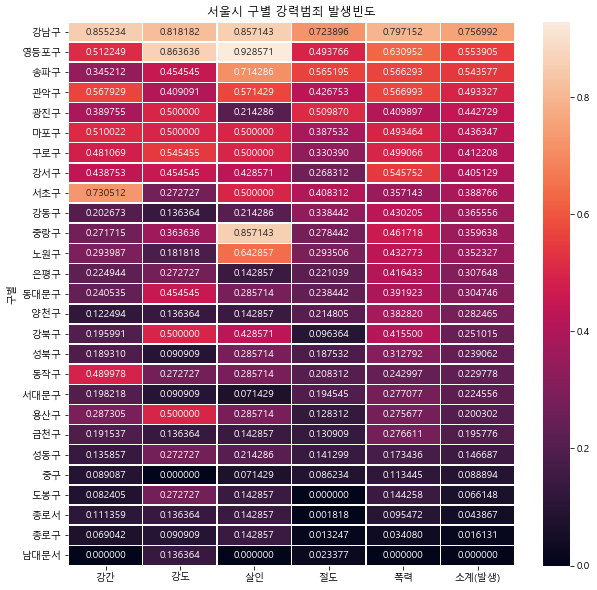

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='소계(발생)', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('서울시 구별 강력범죄 발생빈도')
plt.show()

### Data Visualization 2 : 서울시 구별 인구수 대비 범죄율

In [24]:
target_col = ['강간', '강도', '살인', '절도', '폭력','소계(발생)']
frame_temp = frame_by_gu[target_col].div(frame_by_gu['인구수'],axis=0)
max_column = frame_temp.max() # vector
min_column = frame_temp.min()
crime_count_norm = (frame_temp - min_column)/max_column
crime_count_norm.head()

,강간,강도,살인,절도,폭력,소계(발생)
구별,,,,,,
강남구,0.604436,0.450647,0.488742,0.347481,0.312701,0.341475
강동구,0.104841,0.040758,0.079506,0.201959,0.162960,0.177384
강북구,0.243549,0.552740,0.446525,0.123127,0.367937,0.243656
강서구,0.223254,0.197887,0.172551,0.049045,0.116393,0.086143
관악구,0.412776,0.213108,0.329564,0.202768,0.200695,0.209104


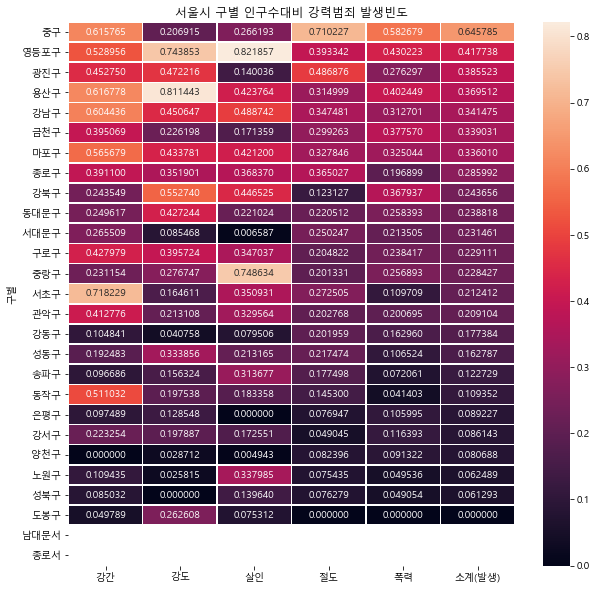

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='소계(발생)', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('서울시 구별 인구수대비 강력범죄 발생빈도')
plt.show()

# folium
python 라이브러리로 실제 지리학적 정보 시각화에 유용한 도구\
프로젝트에서 사용된 json파일은 서울시 부분만 추려내었음.\
json파일의 각 id가 위 pd.DataFrame의 index와 일치

### Data Visualization 3 : 각 구별 살인 횟수

In [38]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [39]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))



In [41]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = frame_by_gu['살인'],
               columns = [frame_by_gu.index, frame_by_gu['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

### Data Visualization 4 : 각 구별 검거율

In [43]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = frame_by_gu['검거율'],
               columns = [frame_by_gu.index, frame_by_gu['검거율']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map
